**Name** -  Yoginder Singh & Rohan Pradeep

**School of Business, St Lawrence College**

**ADMN5016: Applied Artificial Intelligence and Machine learning**

**Assignment: Project_Stroke Prediction**

 



**About the Project** 

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths. This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

**Variable Information**

1) id: unique identifier
2) gender: "Male", "Female" or "Other" 
3) age: age of the patient 
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension 
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease 
6) ever_married: "No" or "Yes" 
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed" 
8) Residence_type: "Rural" or "Urban" 
9) avg_glucose_level: average glucose level in blood 
10) bmi: body mass index 
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"* 
12) stroke: 1 if the patient had a stroke or 0 if not *Note: "Unknown" in smoking_status means that the information is unavailable for this patient


**Importing necessary packages**

In [12]:
import pandas as pd 
import numpy as np
import yfinance as yf

from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import KernelPCA, PCA, TruncatedSVD
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, silhouette_samples, calinski_harabasz_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from imblearn.over_sampling import SMOTE
%matplotlib inline

## Exploratory Data Analysis ##

In [14]:
df = pd.read_csv("C:/Users/yogin/Downloads/healthcare-dataset-stroke-data.csv")

In [15]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [16]:
#full summary of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


**Checking if data balanced**

In [125]:
# Balance of the 'sroke' column
print(df['stroke'].value_counts())

0    4861
1     249
Name: stroke, dtype: int64


The output indicates that in dataset, there are 4861 instances where the 'Stroke' (Stroke) column is marked as 0 (indicating no stroke) and 249 instances where it is marked as 1 (indicating stroke). This shows a significant imbalance in the data: a large majority of the entries are for non-stroke cases. In such scenarios, this imbalance could impact the performance of machine learning models, as they might become biased towards predicting the majority class. We might need to consider techniques like oversampling the minority class or undersampling the majority class to balance the data before further analysis or modeling.

**Descriptive Statistics**

In [24]:
#Descriptive statistics for each feature
df['id'] = df['id'].astype('category')
df['stroke'] = df['stroke'].astype('category')
print(df.describe().T)

                    count        mean        std    min     25%     50%  \
age                5110.0   43.226614  22.612647   0.08  25.000  45.000   
hypertension       5110.0    0.097456   0.296607   0.00   0.000   0.000   
heart_disease      5110.0    0.054012   0.226063   0.00   0.000   0.000   
avg_glucose_level  5110.0  106.147677  45.283560  55.12  77.245  91.885   
bmi                4909.0   28.893237   7.854067  10.30  23.500  28.100   

                      75%     max  
age                 61.00   82.00  
hypertension         0.00    1.00  
heart_disease        0.00    1.00  
avg_glucose_level  114.09  271.74  
bmi                 33.10   97.60  


C:\Users\yogin\AppData\Local\Temp\ipykernel_25992\3670052701.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


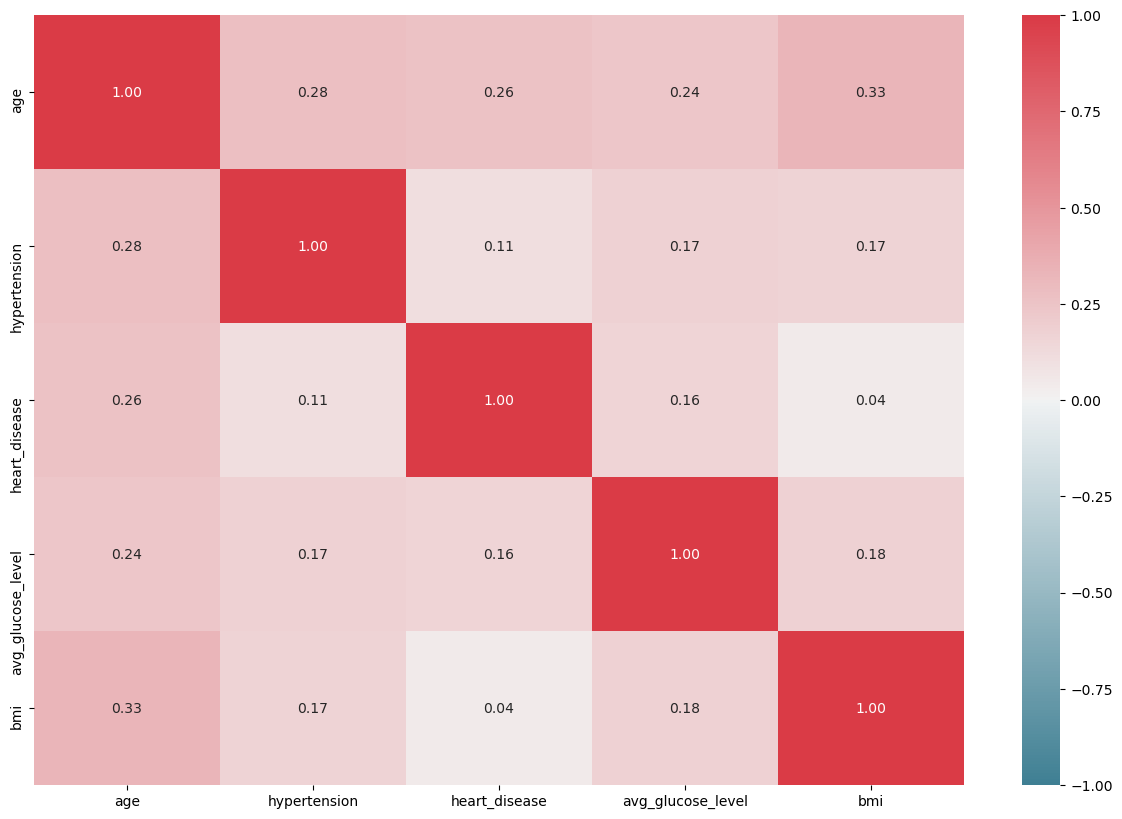

In [25]:
# Calculate correlations
correlation_matrix = df.corr()

# Heatmap of correlation matrix
#plt.figure(figsize=(12, 8))
#sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
#plt.show()
plt.figure(figsize=(15,10))
cmap=sns.diverging_palette(220,10, as_cmap=True)
sns.heatmap(correlation_matrix, annot=True, cmap=cmap,vmin=-1,vmax=1, center=0, fmt='.2f')
plt.show()


Predictors are not too overly correlated with one another. Predictor are low multicollinearity which is good for the model

**Missing Data**

In [26]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

(array([  4.,   9.,  55., 133., 210., 252., 331., 409., 452., 520., 512.,
        402., 370., 304., 221., 182., 129., 112.,  83.,  69.,  33.,  22.,
         25.,  11.,  14.,  14.,  13.,   4.,   4.,   2.,   2.,   1.,   1.,
          0.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   1.]),
 array([10.3  , 12.046, 13.792, 15.538, 17.284, 19.03 , 20.776, 22.522,
        24.268, 26.014, 27.76 , 29.506, 31.252, 32.998, 34.744, 36.49 ,
        38.236, 39.982, 41.728, 43.474, 45.22 , 46.966, 48.712, 50.458,
        52.204, 53.95 , 55.696, 57.442, 59.188, 60.934, 62.68 , 64.426,
        66.172, 67.918, 69.664, 71.41 , 73.156, 74.902, 76.648, 78.394,
        80.14 , 81.886, 83.632, 85.378, 87.124, 88.87 , 90.616, 92.362,
        94.108, 95.854, 97.6  ]),
 <BarContainer object of 50 artists>)

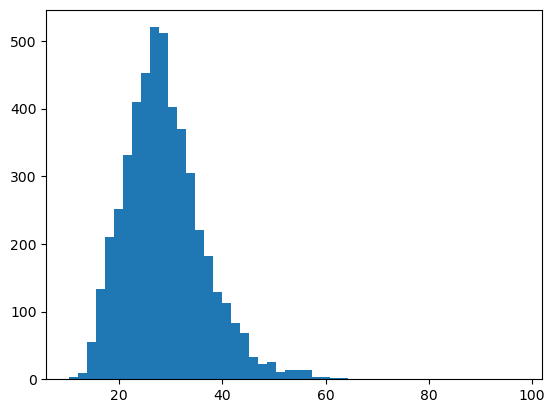

In [37]:
plt.hist(df['bmi'], bins = 50) 
# to check the distrubition of bmi, if it is normally distrubited we can use mean as replacement
#for missing value, otherwise we will use median

In [39]:
# Creating an imputer object with a median filling strategy for numerical columns
imputer = SimpleImputer(strategy='mean')
# numerical (replace with your actual numerical columns)
numerical_cols = ['bmi']
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])


In [40]:
missing_values_2 = df.isnull().sum()
missing_values_2

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Lets, explore the data further to check does age makes one more likely to suffer a stroke? What about gender? Or BMI?

In [42]:
variables = [variable for variable in df.columns if variable not in ['id','stroke']]

conts = ['age','avg_glucose_level','bmi']

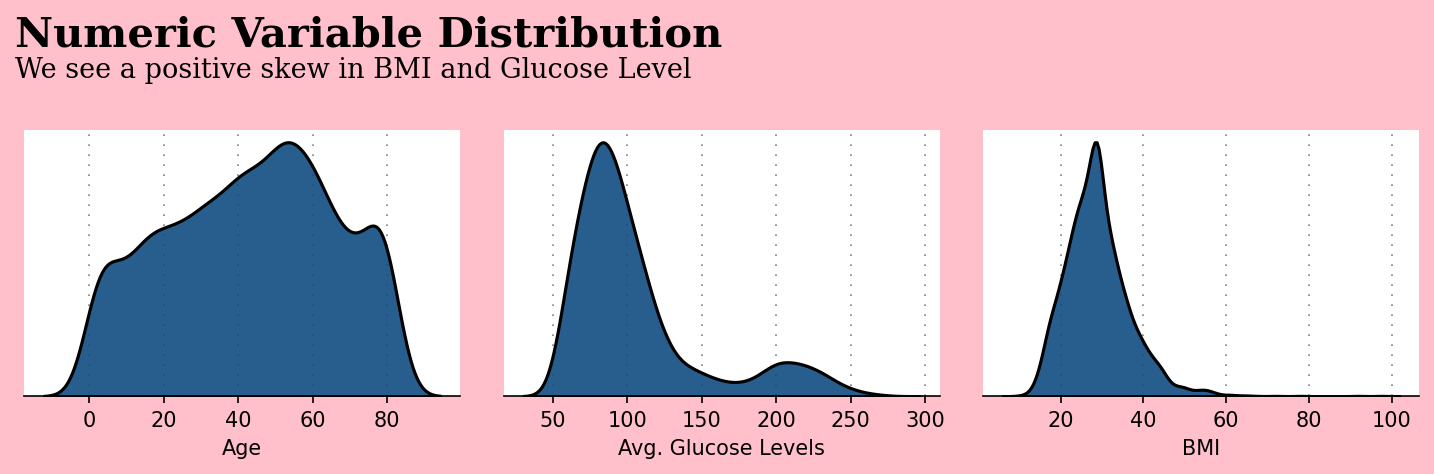

In [48]:
fig = plt.figure(figsize=(12, 12), dpi=150, facecolor='pink')
gs = fig.add_gridspec(4, 3)
gs.update(wspace=0.1, hspace=0.4)

background_color = "white"

plot = 0
for row in range(0, 1):
    for col in range(0, 3):
        locals()["ax"+str(plot)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(plot)].set_facecolor(background_color)
        locals()["ax"+str(plot)].tick_params(axis='y', left=False)
        locals()["ax"+str(plot)].get_yaxis().set_visible(False)
        for s in ["top","right","left"]:
            locals()["ax"+str(plot)].spines[s].set_visible(False)
        plot += 1

plot = 0
for variable in conts:
        sns.kdeplot(df[variable] ,ax=locals()["ax"+str(plot)], color='#0f4c81', shade=True, linewidth=1.5, ec='black',alpha=0.9, zorder=3, legend=False)
        locals()["ax"+str(plot)].grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))
        #locals()["ax"+str(plot)].set_xlabel(variable) removed this for aesthetics
        plot += 1
        
ax0.set_xlabel('Age')
ax1.set_xlabel('Avg. Glucose Levels')
ax2.set_xlabel('BMI')


ax0.text(-20, 0.022, 'Numeric Variable Distribution', fontsize=20, fontweight='bold', fontfamily='serif')
ax0.text(-20, 0.02, 'We see a positive skew in BMI and Glucose Level', fontsize=13, fontweight='light', fontfamily='serif')

plt.show()

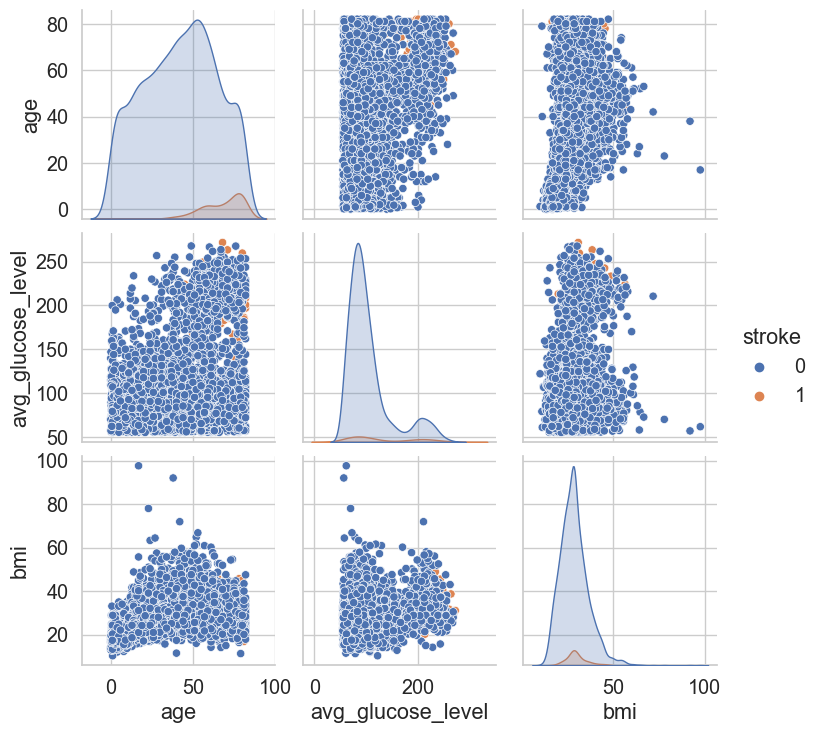

In [56]:
#Check the comparison of different features with ‘Stroke’ column
X=df.drop(columns=['stroke'],axis=1)
y=df['stroke']
sns.pairplot(df, hue='stroke',vars = ['age','avg_glucose_level','bmi'])


## Model Development ##

In [61]:
# Changing categorical values

df['gender'] = df['gender'].replace({'Male':0,'Female':1,'Other':-1}).astype(np.uint8)
df['Residence_type'] = df['Residence_type'].replace({'Rural':0,'Urban':1}).astype(np.uint8)
df['work_type'] = df['work_type'].replace({'Private':0,'Self-employed':1,'Govt_job':2,'children':-1,'Never_worked':-2}).astype(np.uint8)
df['smoking_status'] = df['smoking_status'].replace({'formerly smoked':0,'never smoked':1,'smokes':2,'Unknown':-1}).astype(np.uint8)
df['ever_married'] = df['ever_married'].replace({'Yes':0,'No':1}).astype(np.uint8)

In [62]:
df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,67.0,0,1,0,0,1,228.69,36.600000,0,1
1,51676,1,61.0,0,0,0,1,0,202.21,28.893237,1,1
2,31112,0,80.0,0,1,0,0,0,105.92,32.500000,1,1
3,60182,1,49.0,0,0,0,0,1,171.23,34.400000,2,1
4,1665,1,79.0,1,0,0,1,0,174.12,24.000000,1,1


In [63]:
df = df.drop(columns=['id'],axis =1) # dropping id as it is not required

In [66]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,0,0,1,228.69,36.600000,0,1
1,1,61.0,0,0,0,1,0,202.21,28.893237,1,1
2,0,80.0,0,1,0,0,0,105.92,32.500000,1,1
3,1,49.0,0,0,0,0,1,171.23,34.400000,2,1
4,1,79.0,1,0,0,1,0,174.12,24.000000,1,1


In [67]:
# Droping the target variable

In [68]:
X = df.drop(columns=['stroke'])
y = df["stroke"]

In [69]:
# Spliting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

(array([3901.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         187.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

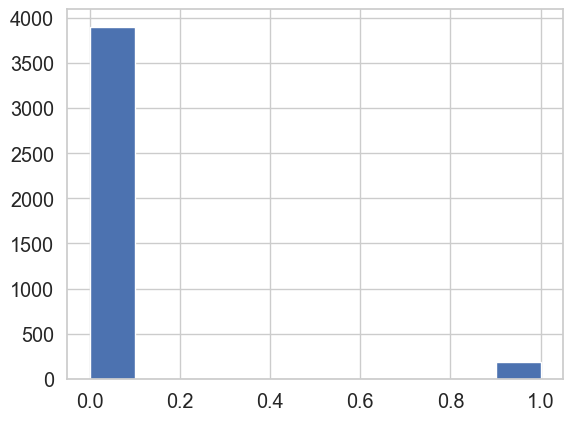

In [70]:
plt.hist(y_train)

**Applying SMOTE**

In [71]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train,y_train)

(array([3901.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        3901.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

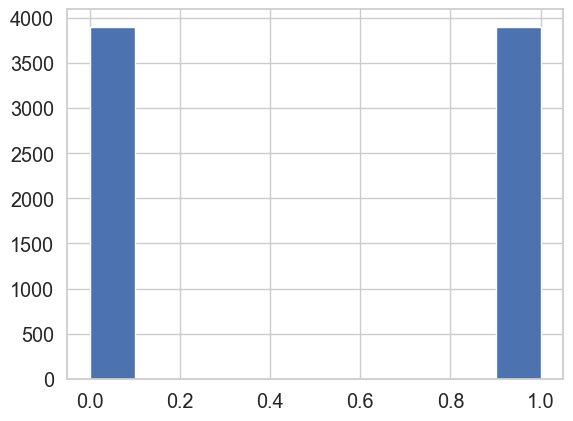

In [72]:
plt.hist(y_train_resampled)

Standardizing features by removing the mean and scaling to unit variance. Standardization of features is a common preprocessing step in machine learning to ensure that different features have the same scale. 

In [74]:
scaler=StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

**Creating model-LR**

In [76]:
logistic_model = LogisticRegression()

**Training in Logistic regression**

In [78]:
logistic_model.fit(X_train_resampled, y_train_resampled)


LogisticRegression()

**Testing in Logistic regression**

y_pred_lg= logistic_model.predict(X_test)
accuracy_lg = accuracy_score(y_test, y_pred_lg)
precision_lg = precision_score(y_test, y_pred_lg)
recall_lg = recall_score(y_test, y_pred_lg)
f1_lg = f1_score(y_test, y_pred_lg)
consufion_lg = confusion_matrix(y_test, y_pred_lg)

**Result of Logistic Regression**

In [80]:
print("Accuracy:", accuracy_lg)
print("Precision:",precision_lg)
print("recall:", recall_lg)
print("f1_Score:", f1_lg)
print("Confusion Matrix:\n", consufion_lg )

Accuracy: 0.7681017612524462
Precision: 0.1541501976284585
recall: 0.6290322580645161
f1_Score: 0.2476190476190476
Confusion Matrix:
 [[746 214]
 [ 23  39]]


**Creating model-Random Forest**

In [82]:
random_forest_model = RandomForestClassifier()

**Training in Random Forest**

In [83]:
random_forest_model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier()

In [84]:
y_pred_rf= random_forest_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
consufion_rf = confusion_matrix(y_test, y_pred_rf)

**Result of Random Forest**

In [85]:
print("Accuracy:", accuracy_rf)
print("Precision:",precision_rf)
print("recall:", recall_rf)
print("f1_Score:", f1_rf)
print("Confusion Matrix:\n", consufion_rf )

Accuracy: 0.8816046966731899
Precision: 0.10666666666666667
recall: 0.12903225806451613
f1_Score: 0.11678832116788321
Confusion Matrix:
 [[893  67]
 [ 54   8]]


# Hyperparameter tunning

Hyperparameter adjustment in Random Forest as random forest output is better than logistic regression

In [116]:
# Define the parameters to tune
param_grid = {
    'n_estimators': [100, 200],
    'max_features':[2,3],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap' : [True,False]
    
}

In [117]:
decision_model = RandomForestClassifier()      

In [118]:
grid_search = GridSearchCV(decision_model, param_grid=param_grid,cv=3, n_jobs=-1)


In [119]:
# Fit the grid search to your data
grid_search.fit(X_train_resampled, y_train_resampled)

# Print the best hyperparameters
print("Best hyperparameters found: ", grid_search.best_params_)


Best hyperparameters found:  {'bootstrap': False, 'max_depth': 20, 'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [120]:
rfc = RandomForestClassifier(bootstrap= False, max_depth= 20, max_features= 2, min_samples_leaf=1, min_samples_split= 2, n_estimators= 100 )

In [121]:
rfc.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(bootstrap=False, max_depth=20, max_features=2)

In [122]:
y_pred_rf2= rfc.predict(X_test)
accuracy_rf2 = accuracy_score(y_test, y_pred_rf2)
precision_rf2 = precision_score(y_test, y_pred_rf2)
recall_rf2 = recall_score(y_test, y_pred_rf2)
f1_rf2 = f1_score(y_test, y_pred_rf2)
consufion_rf2 = confusion_matrix(y_test, y_pred_rf2)

In [123]:
print("Accuracy:", accuracy_rf2)
print("Precision:",precision_rf2)
print("recall:", recall_rf2)
print("f1_Score:", f1_rf2)
print("Confusion Matrix:\n", consufion_rf2 )

Accuracy: 0.8884540117416829
Precision: 0.10606060606060606
recall: 0.11290322580645161
f1_Score: 0.109375
Confusion Matrix:
 [[901  59]
 [ 55   7]]


So the hyper-parameter tuning has helped the Random Forest model. It's confusion matrix and recall score is better than previous output.

***Summary of Findings***

Here's a summary of the key findings from your report on stroke prediction using machine learning models:

**Understanding Data** In our analysis, we began by thoroughly examining the dataset, identifying Age as a potentially significant predictor of stroke based on initial observations. We then proceeded to visualize the data to gain deeper insights.

**Data Imbalance Challenge**: The dataset showed a significant imbalance between non-stroke (4861 cases) and stroke cases (249), which posed a risk of model bias towards predicting stroke outcomes. This could lead to misleading accuracy metrics.

**Data Preprocessing Techniques**: To address data imbalance, techniques like SMOTE (Synthetic Minority Over-sampling Technique) were employed. For missing values, mean were used instead of median as bmi column was normality distrubuted.

**Descriptive and Correlation Analysis**: Basic statistical analysis focused on central tendencies and distribution, highlighting the mean, median, and mode of financial indicators. Correlation analysis indicated low multicollinearity among predictors, beneficial for reliable model predictions.

**Model Development and Standardization**: Two models were developed: Logistic Regression and RandomForestClassifier. Feature standardization was achieved using StandardScaler to ensure no single feature disproportionately influenced the model due to its scale.

**Comparative Model Performance**:   
    - Logistic Regression showed a higher recall but suffered from low precision and F1 score, indicating many false positives.
        - RandomForestClassifier outperformed in accuracy (0.88 vs. 0.77) and F1 score (0.12 vs. 0.24), making it a more balanced choice.
    
**Conclusion and Future Directions**: The RandomForest model was recommended for its accuracy and balanced performance in precision and recall. It was deemed highly suitable for our. Future steps involve exploring advanced machine learning and deep learning techniques for more robust and versatile predictive tools. In our quest to enhance model performance, we engaged in hyperparameter tuning for RandomForest models. This effort aimed to fine-tune the models and potentially improve their predictive capabilities.